# IML Assignment 1

## Name: Ruslan Abdullin
## mail: ru.abdullin@innopolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [2596]:
import pandas as pd

df = pd.read_csv('task1_data.csv')
df

,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108
5,0.944209,0.693082,0.862069,1.253020
6,0.961715,-0.196149,1.034483,1.451991
7,1.089511,1.960637,1.206897,1.624378
8,1.204234,2.063510,1.379310,1.767024
9,2.196011,1.404661,1.551724,1.877318


In [2597]:
X_train, y_train, X_test, y_test = df.X_train, df.y_train, df.X_test, df.y_test

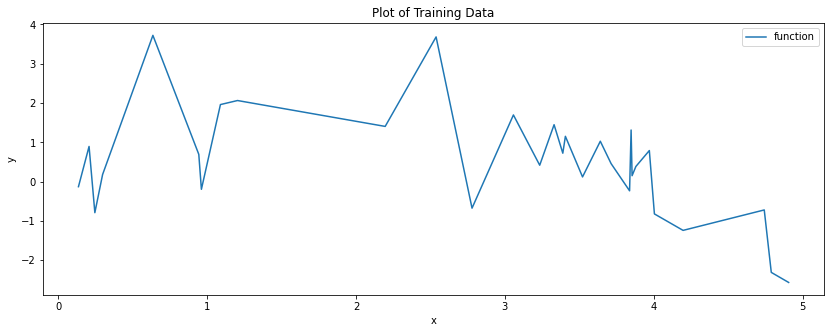

In [2598]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_train, y_train, label='function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Training Data')

plt.legend(loc='best')
plt.show()

#### Linear regression model fitting

In [2599]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()

X_train_reshaped = np.array(X_train).reshape(-1, 1)
y_train_reshaped = np.array(y_train).reshape(-1, 1)

reg.fit(X_train_reshaped, y_train_reshaped)

print(f'Intercept: {reg.intercept_[0]} \nCoefficient: {reg.coef_[0][0]}')

Intercept: 1.4786205219742725 
Coefficient: -0.3606168190812585


#### Linear regression model prediction & Evaluation


In [2600]:
def print_metrics(y_actual, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse} \nRMSE: {rmse} \nMAE: {mae} \nR2 score: {r2}')


X_test_reshaped = np.array(X_test).reshape(-1, 1)
y_pred_lr = reg.predict(X_test_reshaped)

In [2601]:
print_metrics(y_train, y_pred_lr)

MSE: 0.78105677092199 
RMSE: 0.8837741628504365 
MAE: 0.783761030241441 
R2 score: 0.2609450135378707


#### Plotting original data and prediction


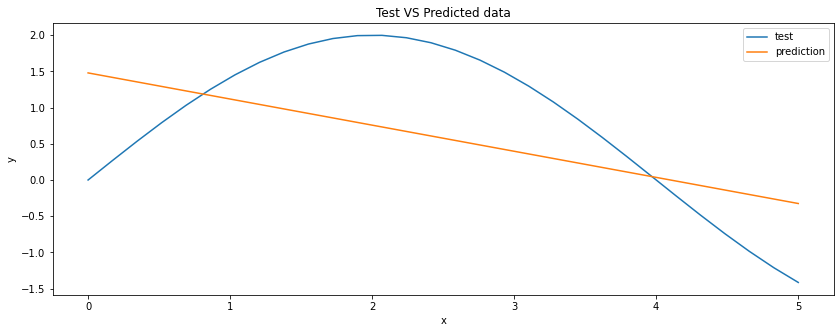

In [2602]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.plot(X_test, y_test, label="test")
plt.plot(X_test, y_pred_lr, label="prediction")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Test VS Predicted data")

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer
In general, the goodness of fit of a linear regression model is typically evaluated using measures such as the coefficient of determination (R-squared), adjusted R-squared, and root mean squared error (RMSE). A higher R-squared indicates that the model explains a larger proportion of the variation in the response variable, while a lower RMSE indicates that the model's predictions are closer to the actual values. However, it is important to note that these measures should not be used in isolation to determine the overall goodness of fit of a model. Other factors, such as the validity of the model assumptions and the potential for bias or confounding, should also be considered.

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [2603]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2604]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

#### Tuning the degree hyper-parameter using GridSearch

In [2605]:
from sklearn.model_selection import GridSearchCV

degrees = range(2, 10)
search = GridSearchCV(pipeline, {'poly__degree': degrees}, cv=8, scoring='neg_mean_squared_error')
search.fit(X_train_reshaped, y_train_reshaped)

y_pred_pr = search.predict(X_test_reshaped)

print(f'Best parameter (CV score = {search.best_score_:.4f}): {search.best_params_.get("poly__degree")}')

Best parameter (CV score = -1.0783): 2


In [2606]:
print_metrics(y_train, y_pred_pr)

MSE: 0.08205877217937993 
RMSE: 0.2864590235607528 
MAE: 0.15213273421671727 
R2 score: 0.9223539862658873


#### Manually finding the best degree

In [2607]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=8)

best_score = float('-inf')
best_degree = None

for degree in degrees:
    pipeline = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    scores = cross_val_score(pipeline, X_train_reshaped, y_train, cv=kf, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_degree = degree

print(f'Best degree: {best_degree} \nBest score: {best_score:.4f}')


Best degree: 2 
Best score: -1.0783


#### Plotting the test data and the best degree polynomial model
The linear regression model showed poor performance as indicated by the high mean squared error and mean absolute error values, which suggest significant deviation between predicted and actual values. The model's low R-squared value indicates poor explanatory power and limited ability to account for the variability in the data. Furthermore, the high root mean squared error (RMSE) highlights that the model's predictions are notably different from the actual values. Therefore, it is apparent that the model requires improvement or replacement with a better alternative.

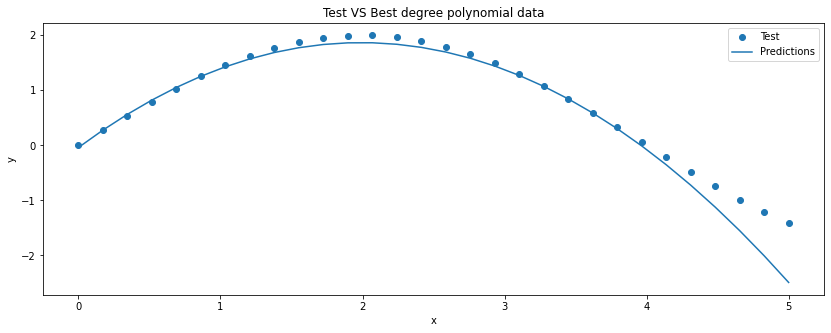

In [2608]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.scatter(X_test, y_test, label="Test")
plt.plot(X_test, y_pred_pr, label="Predictions")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Test VS Best degree polynomial data")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [2609]:
import pandas as pd

df = pd.read_csv("pokemon_modified.csv")
df

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,97,Celesteela,NaN,steel,107,101,61,999.9,7,1
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,59,Kartana,NaN,grass,59,31,109,0.1,7,1
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,223,Guzzlord,NaN,dark,97,53,43,888.0,7,1
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,97,Necrozma,NaN,psychic,127,89,79,230.0,7,1


#### Remove the 2 redundant features

In [2610]:
X = df.drop(["name", "classification", "is_legendary"], axis=1)

y = df["is_legendary"]

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [2611]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Check if the dataset is balanced or not and comment on it

When analyzing the given dataset, it can be observed that the number of samples in each class is highly imbalanced. The majority class (is not legendary) represents around 91-92% of the samples, whereas the minority class (is legendary) represents only around 8-9% of the samples. This can lead to bias in the model towards the majority class, resulting in poor performance in predicting the minority class. It is important to handle class imbalance before training the model to ensure better performance on both classes. A balanced dataset, where the number of samples in each class is roughly equal or within a reasonable range, can improve model performance and prevent bias towards a particular class.

In [2612]:
print(f'y: {pd.Series(y).value_counts(normalize=True)[0]:.4f}')
print(f'y_test: {pd.Series(y_test).value_counts(normalize=True)[0]:.4f}')
print(f'Y_train: {pd.Series(y_train).value_counts(normalize=True)[0]:.4f}')

y: 0.9126
y_test: 0.9130
Y_train: 0.9125


#### Exploring the dataset and checking for missing values

In [2613]:
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [2614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

#### Impute the missing values

In [2615]:
print(df.isnull().sum())

against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classification        0
defense               0
experience_growth     0
height_m             20
hp                    0
name                  0
percentage_male      98
type1                 0
sp_attack             0
sp_defense            0
speed                 0
weight_kg            20
generation            0
is_legendary          0
dtype: int64


In [2616]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
imp.fit(X_train)
X_train = pd.DataFrame(imp.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imp.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [2617]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
X_train

against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
defense              0
experience_growth    0
height_m             0
hp                   0
percentage_male      0
type1                0
sp_attack            0
sp_defense           0
speed                0
weight_kg            0
generation           0
dtype: int64
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation
0,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.0,...,1000000,1.2,74,88.1,water,83,65,32,81.0,5
1,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,0.5,...,1250000,0.4,100,50.0,psychic,100,100,100,4.0,5
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1059860,1.7,80,50.0,grass,100,70,70,15.5,1
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,...,1250000,1.2,95,0.0,normal,40,70,100,75.5,2
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1000000,2.5,100,50.0,ground,55,85,35,920.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.5,1.0,2.0,...,600000,0.9,67,88.1,rock,30,30,58,31.5,4
636,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,1000000,1.7,80,50.0,water,95,80,85,76.6,1
637,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1059860,0.7,45,88.1,grass,65,65,45,6.9,1
638,1.0,1.0,1.0,0.0,1.0,0.5,2.0,2.0,1.0,1.0,...,600000,0.5,31,50.0,bug,30,30,40,5.5,3


#### Encode categorically

In [2618]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['type1']

In [2619]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [2620]:
def ohe_new_features(df, feature_names, encoder):
    new_feats = encoder.transform(df[feature_names])
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(feature_names))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(feature_names, axis=1, inplace=True)
    return new_df


encoder.fit(X_train[categorical_features])

X_train = ohe_new_features(X_train, categorical_features, encoder)
X_test = ohe_new_features(X_test, categorical_features, encoder)

X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.5,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,1.0,1.0,1.0,0.0,1.0,0.5,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [2621]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

## Are there highly co-related features in the dataset? Is it a problem?
To determine if there are highly correlated features in a dataset, you can calculate the correlation coefficients between all pairs of features. A correlation coefficient is a numerical measure of the strength and direction of the linear relationship between two variables, and it ranges from -1 to 1. A coefficient of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

If there are highly correlated features in a dataset, it can be a problem for several reasons. First, it can lead to multicollinearity in regression models, which occurs when two or more predictors are highly correlated with each other. This can make it difficult to estimate the independent effect of each predictor on the response variable and can lead to unstable or unreliable parameter estimates.

Second, highly correlated features can lead to overfitting in machine learning models, where the model fits the training data too closely and performs poorly on new, unseen data.

However, the impact of highly correlated features on model performance depends on the specific problem being addressed and the modeling techniques used. In some cases, highly correlated features may not be a problem, especially if they are highly relevant to the response variable and provide important information about the underlying process being modeled.

Therefore, it is important to carefully evaluate the correlation structure of a dataset and consider the potential impact of highly correlated features on the performance and interpretation of the models being used.

The highly co-related features of this dataset is 0,74, but its norm

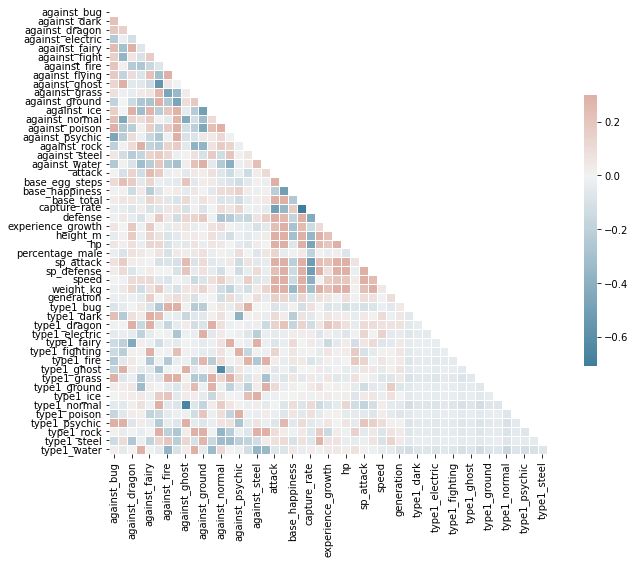

In [2622]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

corr_matrix = X_train.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

### Model fitting and Comparison

#### Tuning LR model

In [2623]:
def print_clf_metrics(y_actual, y_pred):
    accuracy = metrics.accuracy_score(y_actual, y_pred)
    precision = metrics.precision_score(y_actual, y_pred)
    recall = metrics.recall_score(y_actual, y_pred)
    f1_score = metrics.f1_score(y_actual, y_pred)

    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1_score:.4f}")

In [2624]:
parameters = {'penalty': ['l2'],
              'C': np.logspace(-3, 3, 7),
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}

max_iter=1000 in LR constructor

In [2625]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

max_iter = 1000

lr_clf = LogisticRegression(max_iter=max_iter)
gs_clf = GridSearchCV(lr_clf, parameters, error_score=0)

In [2626]:
gs_clf.fit(X_train, y_train)

GridSearchCV(error_score=0, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [2627]:
print(f'Tuned Hyper-parameters: {gs_clf.best_params_}')
print(f'Accuracy: {gs_clf.best_score_:.4f}')

Tuned Hyper-parameters: {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9891


#### Construct an LR with the best params and Evaluate the LR with the best params

In [2628]:
best_lr_clf = LogisticRegression(max_iter=1000, **gs_clf.best_params_)
best_lr_clf.fit(X_train, y_train)

LogisticRegression(C=100.0, max_iter=1000, solver='newton-cg')

In [2629]:
y_pred_lr = best_lr_clf.predict(X_test)

In [2630]:
print_clf_metrics(y_test, y_pred_lr)

Accuracy:  0.9938
Precision: 0.9333
Recall:    1.0000
F1-score:  0.9655


#### Print the top 5 most influencing features and the top 5 ignored features

In [2631]:
coefs = best_lr_clf.coef_
print(f'Regression coefficients: {coefs[0]}')

top_indices = np.argsort(-np.abs(coefs))[0][:5]
bottom_indices = np.argsort(-np.abs(coefs))[0][-5:]

feature_names = X_train.columns.values
top_features = feature_names[top_indices]
bottom_features = feature_names[bottom_indices]

print(f'Top 5 most influential features: {top_features}')
print(f'Top 5 ignored features: {bottom_features}')

Regression coefficients: [-0.11211405  1.72490933 -4.32542222  1.57591869 -1.47113238 -4.1461608
  2.76168713  0.72812621  0.60808296 -0.64554269  1.64185828 -0.60093672
 -0.13680857  1.18069812 -0.07502025 -2.07217521 -0.41308506 -1.41145042
  3.1644733  14.06968518  1.36955924  6.66552    -9.6473027   4.77256126
  8.92774068 -5.40914574  3.6240311  -3.61852987  0.23096756  1.53557023
  6.19701426  2.96179256  3.7205015   0.36266171 -0.13306864 -1.22387901
  2.00928612 -1.19249438 -0.75506091  4.19241307 -1.81578164  0.90237164
 -0.17144447  2.78203062 -9.41321626 -0.57078789  1.86440452  1.02074693
 -1.15815926  3.28689043]
Top 5 most influential features: ['base_egg_steps' 'capture_rate' 'type1_normal' 'experience_growth'
 'base_total']
Top 5 ignored features: ['type1_ground' 'against_normal' 'type1_dark' 'against_bug'
 'against_psychic']


#### Tuning KNN model

In [2632]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 15)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

knn_clf = KNeighborsClassifier()
gs_clf = GridSearchCV(knn_clf, param_grid, cv=5)
gs_clf.fit(X_train, y_train)

print(f'Tuned Hyper-parameters: {gs_clf.best_params_}')
print(f'Accuracy: {gs_clf.best_score_:.4f}')

Tuned Hyper-parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.9469


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [2633]:
knn_clf = KNeighborsClassifier(**gs_clf.best_params_)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print_clf_metrics(y_test, y_pred)

Accuracy:  0.9752
Precision: 1.0000
Recall:    0.7143
F1-score:  0.8333


#### Fitting GNB to the data and evaluating on the test dataset

In [2634]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
print_clf_metrics(y_test, y_pred)

Accuracy:  0.9317
Precision: 0.5600
Recall:    1.0000
F1-score:  0.7179


#### Which metric is most appropriate for this task and why?
The metric that is most appropriate for this task is precision. This is because the objective of the task is to accurately identify a specific object, in this case, a legendary Pokémon, and it is important to precisely determine its presence. Therefore, precision is the more important metric for this task.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
# What is the best model for this task? and based on what did you pick it?
According to the precision scores obtained from my data, the classifiers achieved the following:
LR: 0.93
KNN: 1
GNB: 0.56

## Bonus Task

#### Loading the Dataset

In [2635]:
import pandas as pd

train_data = pd.read_csv('bonus_train.csv')

test_data = pd.read_csv('bonus_test.csv')

train_data



,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
...,...,...,...,...
265,87.227771,3.738061,320.135382,2
266,-4.605994,3.688628,204.136303,1
267,44.178216,5.085936,198.365089,0
268,6.169277,3.328219,204.934675,0


In [2636]:
# X_train = train_data.
# y_train =
#
# X_test =
# y_test =
#
# print(X_train, y_train, X_test, y_test)

####  Plot the data using the pair plot in sns

In [2637]:
# import seaborn as sns
# import matplotlib.pyplot as plt


#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [2638]:
# multi_lr =


In [2639]:
# print()

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [2640]:
# multi_lr =

In [2641]:
# print()

#### Using gridsearch to tune the C value and multi class

In [2642]:
# params =

In [2643]:
# grid_search_clf =
#
# grid_search_clf.

In [2644]:
# print("Tuned Hyper-parameters :")
# print("Accuracy :")

In [2645]:
# grid_search_clf.

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [2646]:
# multi_lr =

#### Visualize the decision boundaries

In [2647]:
# from mlxtend.plotting import plot_decision_regions
#
# multi_lr =
#
# plot_decision_regions()
#
# plt.xlabel('X_train')
# plt.ylabel('y_train')
# plt.title('Logistic Regression decision boundary)
# plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?
I can't complete task, but In general, a good decision boundary is one that separates the different classes well and generalizes well to new data.

A decision boundary is the line, curve, or surface that separates the different classes in a classification problem. A good decision boundary is one that accurately captures the underlying distribution of the data and separates the different classes in a way that minimizes classification errors.

However, the goodness of a model cannot be solely determined by the decision boundary. Other important factors to consider include the choice of algorithm, the quality and quantity of the data, the feature selection and engineering process, and the appropriate evaluation metrics.

Therefore, it is important to evaluate the performance of a model using appropriate evaluation metrics and to compare it against other models to determine its relative performance. Additionally, it is important to carefully interpret the results in the context of the specific problem being addressed and to consider the potential limitations and assumptions of the model.